# Descriptive Vancouver Weather Classification from Measurements

### Introduction
In our present day and age, climate change has become a non-negligible impact on human life. The possible impact of climate change on human health is increasingly acknowledged. (Auger et al., 2011). To reduce the damage caused by severe weather, people need to predict the future weather. Weather forecasting is essential for providing vital information about severe weather threats and risk management. (Weyn et al., 2019). 

However, weather cannot be modeled simply by the qualitative phenomenon, but by quantitative measurements of weather instruments. The problem this project seeks to adress is that in isolation, quantitative measurements do not describe a qualitative pattern. Using k-nearest-neighbour classification, can weather be described as function of these quantitative measuremnts? If so, as this project will discuss, weather masurement as well as prediction can be further automated, since only quantitative measurements would need to be taken to fully describe the weather.

The dataset we will use is on https://www.kaggle.com/selfishgene/historical-hourly-weather-data. It includes data over separate csv files for different variables, like humidity.csv, pressure.csv etc. We are going to combine them into one dataset and focus on only city Vancouver with date-time, description of weather, humidity, pressure, and temperature.

### Preliminary exploratory data analysis

##### Loading and Tidying data:

In [3]:
#Loading in the data set, selecting the vancouver columns:

library(tidyverse)

humidity_van = read_csv("https://raw.githubusercontent.com/StuartLiv/DSCI100Group/main/data/humidity.csv", col_types = cols()) %>%
            select(datetime, Vancouver)
pressure_van = read_csv("https://raw.githubusercontent.com/StuartLiv/DSCI100Group/main/data/pressure.csv", col_types = cols()) %>%
            select(datetime, Vancouver)
temperature_van = read_csv("https://raw.githubusercontent.com/StuartLiv/DSCI100Group/main/data/temperature.csv", col_types = cols()) %>%
            select(datetime, Vancouver)
wind_van = read_csv("https://raw.githubusercontent.com/StuartLiv/DSCI100Group/main/data/wind_speed.csv", col_types = cols()) %>%
            select(datetime, Vancouver)
description_van = read_csv("https://raw.githubusercontent.com/StuartLiv/DSCI100Group/main/data/weather_description.csv", col_types = cols()) %>%
            select(datetime, Vancouver)

# Merging the data frames, omitting rows with nulls, and converting temperature from kelvin to celsius 
weather_data_verbose = left_join(humidity_van, pressure_van, by = "datetime") %>%
                left_join(temperature_van, by = "datetime") %>%
                left_join(wind_van, by = "datetime") %>%
                left_join(description_van, by = "datetime") %>%
                `colnames<-`(c("datetime", "humidity.pct", "pressure.kpa", "temperature.c", "wind_speed.m/s", "description")) %>%
                na.omit() %>%
                mutate(temperature.c = temperature.c - 273.15)

# mutating the dataframe to use less esoteric weather terms, and make description a factor:

weather_data = weather_data_verbose %>% 
            filter(description != 'volcanic ash' & description != 'dust' & description != 'smoke' & description != 'haze') %>%
            mutate(description = case_when(description %in% c('broken clouds', 'few clouds', 'overcast clouds', 'scattered clouds') ~ 'cloudy',
                                           description %in% c('heavy intensity rain', 'heavy intensity shower rain', 'very heavy rain') ~ 'heavy rain',
                                           description %in% c('drizzle', 'light intensity drizzle', 'light intensity drizzle rain', 'light intensity shower rain', 'light rain and snow') ~ 'light rain',
                                           description %in% c('heavy shower snow', 'light shower snow', 'heavy snow', 'light snow', 'shower snow', 'sleet', 'light shower sleet') ~ 'snow',
                                           description %in% c('proximity thunderstorm', 'ragged thunderstorm', 'thunderstorm with heavy rain', 'thunderstorm with light rain', 'thunderstorm with rain') ~ 'thunderstorm',
                                           description %in% c('proximity shower rain', 'shower rain') ~ 'moderate rain',
                                           description == 'mist' ~ 'fog',
                                           description == 'sky is clear' ~ 'clear sky',
                                           TRUE ~ description)) %>%
            mutate(description = as.factor(description))


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



#####  Tables and graphs:

|| datetime | humidity(pct) | pressure(kpa) | temperature(C) | wind speed (m/s)|
| :---: | :---: | :---: | :---: | :---: | :---: |
| min | 2012-10-02 09:00:00 | 12.00 | 807 |-28.000 |0.000|
|median | 2015-07-02 16:30:00 | 86.00 | 1017 | 10.89 | 2.000 |
| mean | 2015-06-19 19:59:37 | 81.98 | 1018 |11.003 |2.544 |
| max | 2017-10-28 00:00:00 | 100.00 | 1100  |33.850 | 25.000 |

| description | number of appearing times | 
| :---: | :---: | 
| cloudy | 13358 | 
| clear sky | 12061 | 
| light rain | 6518 |
| fog | 4580 | 
| moderate rain | 2224 |
| heavy rain | 662| 
| snow | 605 |
| thunderstorm | 26 |
| sum | 38034 |

#### taking random sample size from each weather

In [6]:
clear_sky <- weather_data %>%
            filter(description == "clear sky")
clear_sky = sample_n(clear_sky, 20)

cloudy <- weather_data %>%
            filter(description == "cloudy")
cloudy = sample_n(cloudy, 20)

fog <- weather_data %>%
            filter(description == "fog")
fog = sample_n(fog, 20)

heavy_rain <- weather_data %>%
            filter(description == "heavy rain")
heavy_rain = sample_n(heavy_rain, 20)

light_rain <- weather_data %>%
            filter(description == "light rain")
light_rain = sample_n(light_rain, 20)

moderate_rain <- weather_data %>%
            filter(description == "moderate rain")
moderate_rain = sample_n(moderate_rain, 20)

snow <- weather_data %>%
            filter(description == "snow")
snow = sample_n(snow, 20)

thunderstorm <- weather_data %>%
            filter(description == "thunderstorm")
thunderstorm = sample_n(thunderstorm, 20)

rbind_data <- rbind(clear_sky, cloudy, fog, heavy_rain, light_rain, moderate_rain, snow, thunderstorm)

options(repr.plot.width = 15, repr.plot.height = 10) 

#### Temp vs humidity

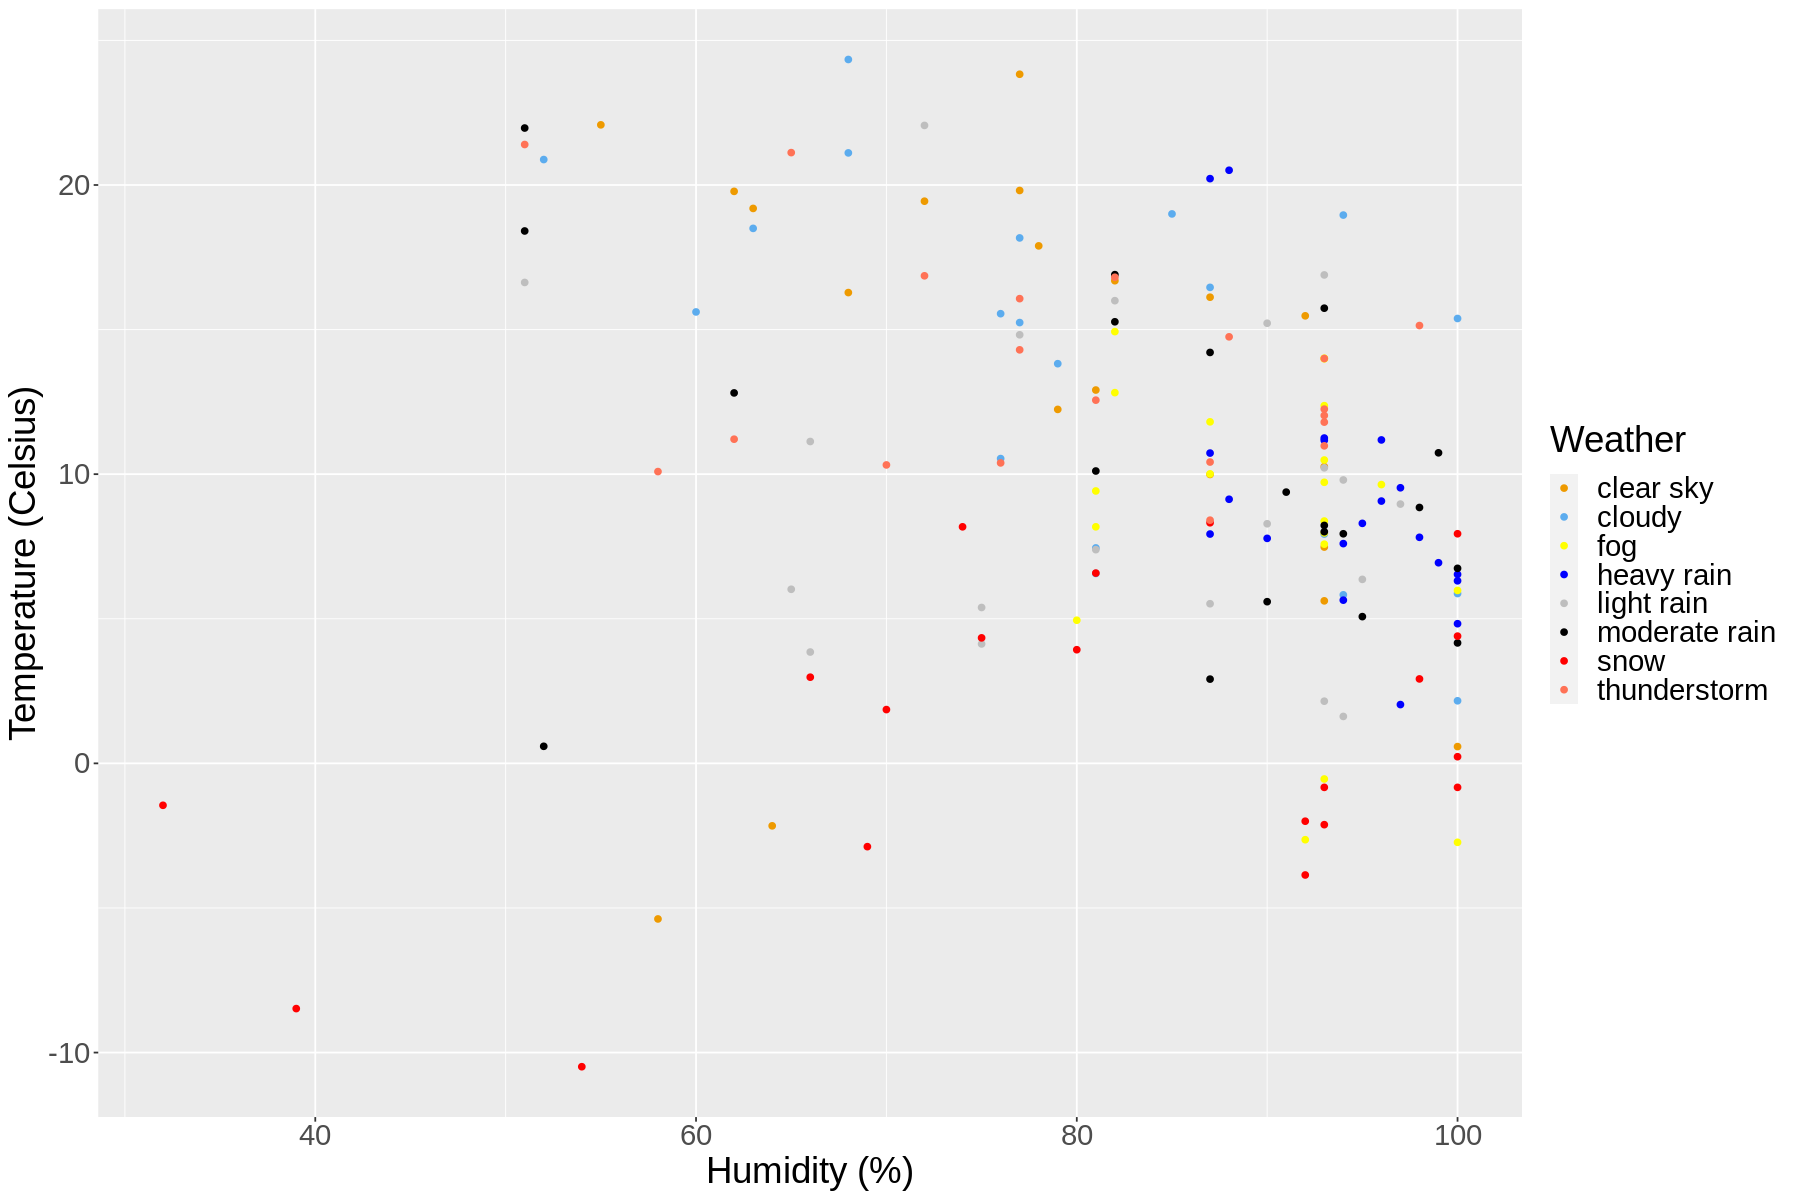

In [7]:
weather_data_plot_temp_vs_hum <- rbind_data %>%
  ggplot(aes(x = humidity.pct, y = temperature.c, color = description)) +
  geom_point(alpha = 4.0) +
  labs(x = "Humidity (%)", 
       y = "Temperature (Celsius)",
       color = "Weather") +
  scale_color_manual(labels = c("clear sky", "cloudy", "fog", "heavy rain", "light rain", "moderate rain", "snow", "thunderstorm"), 
                     values = c("orange2", "steelblue2", "yellow", "blue", "grey", "grey0", "red", "coral1")) +
  theme(text = element_text(size = 22))
weather_data_plot_temp_vs_hum

#### Temp vs Pressure

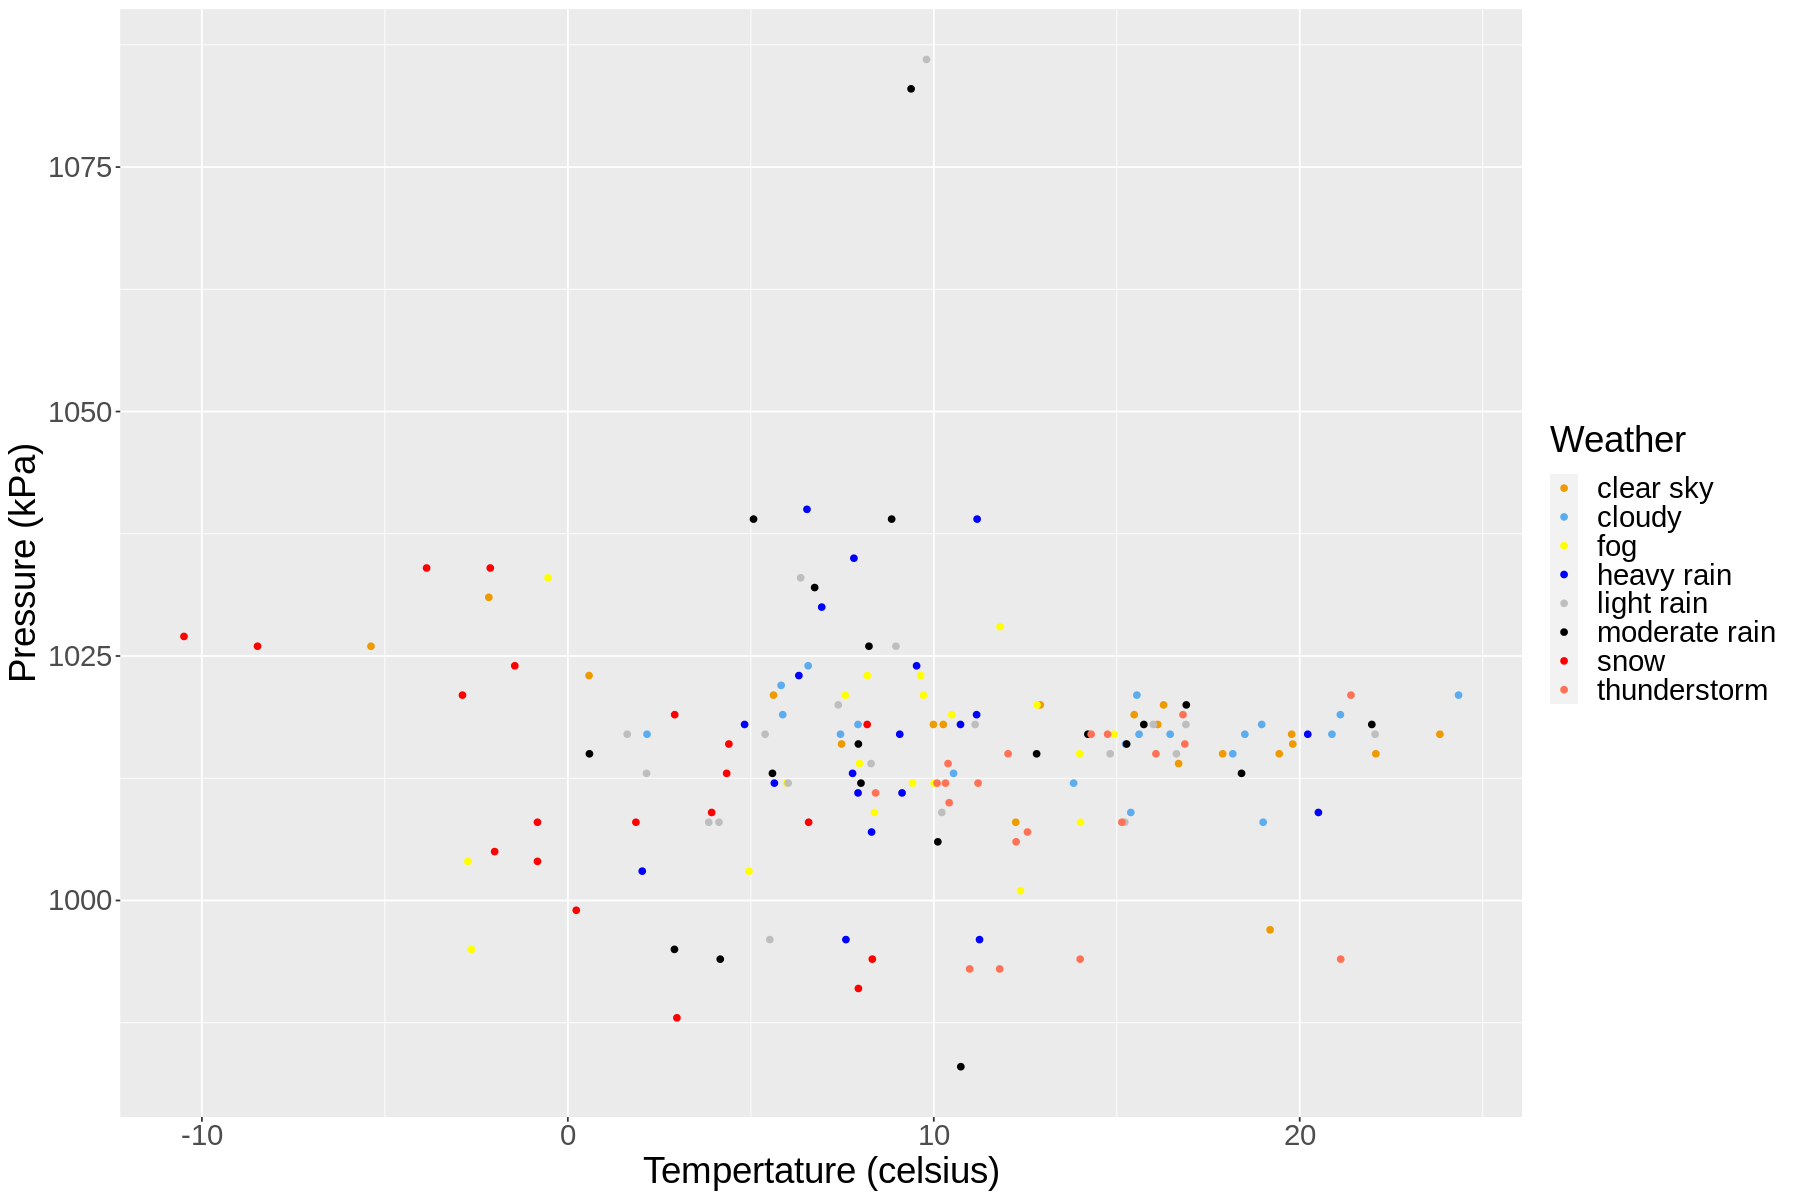

In [8]:
weather_data_plot_temp_vs_prs <- rbind_data %>%
  ggplot(aes(x = temperature.c, y = pressure.kpa, color = description)) +
  geom_point(alpha = 4.0) +
  labs(x = "Tempertature (celsius)", 
       y = "Pressure (kPa)",
       color = "Weather") +
  scale_color_manual(labels = c("clear sky", "cloudy", "fog", "heavy rain", "light rain", "moderate rain", "snow", "thunderstorm"), 
                     values = c("orange2", "steelblue2", "yellow", "blue", "grey", "grey0", "red", "coral1")) +
  theme(text = element_text(size = 22))
weather_data_plot_temp_vs_prs

#### side-by-side plots with pressure color scale

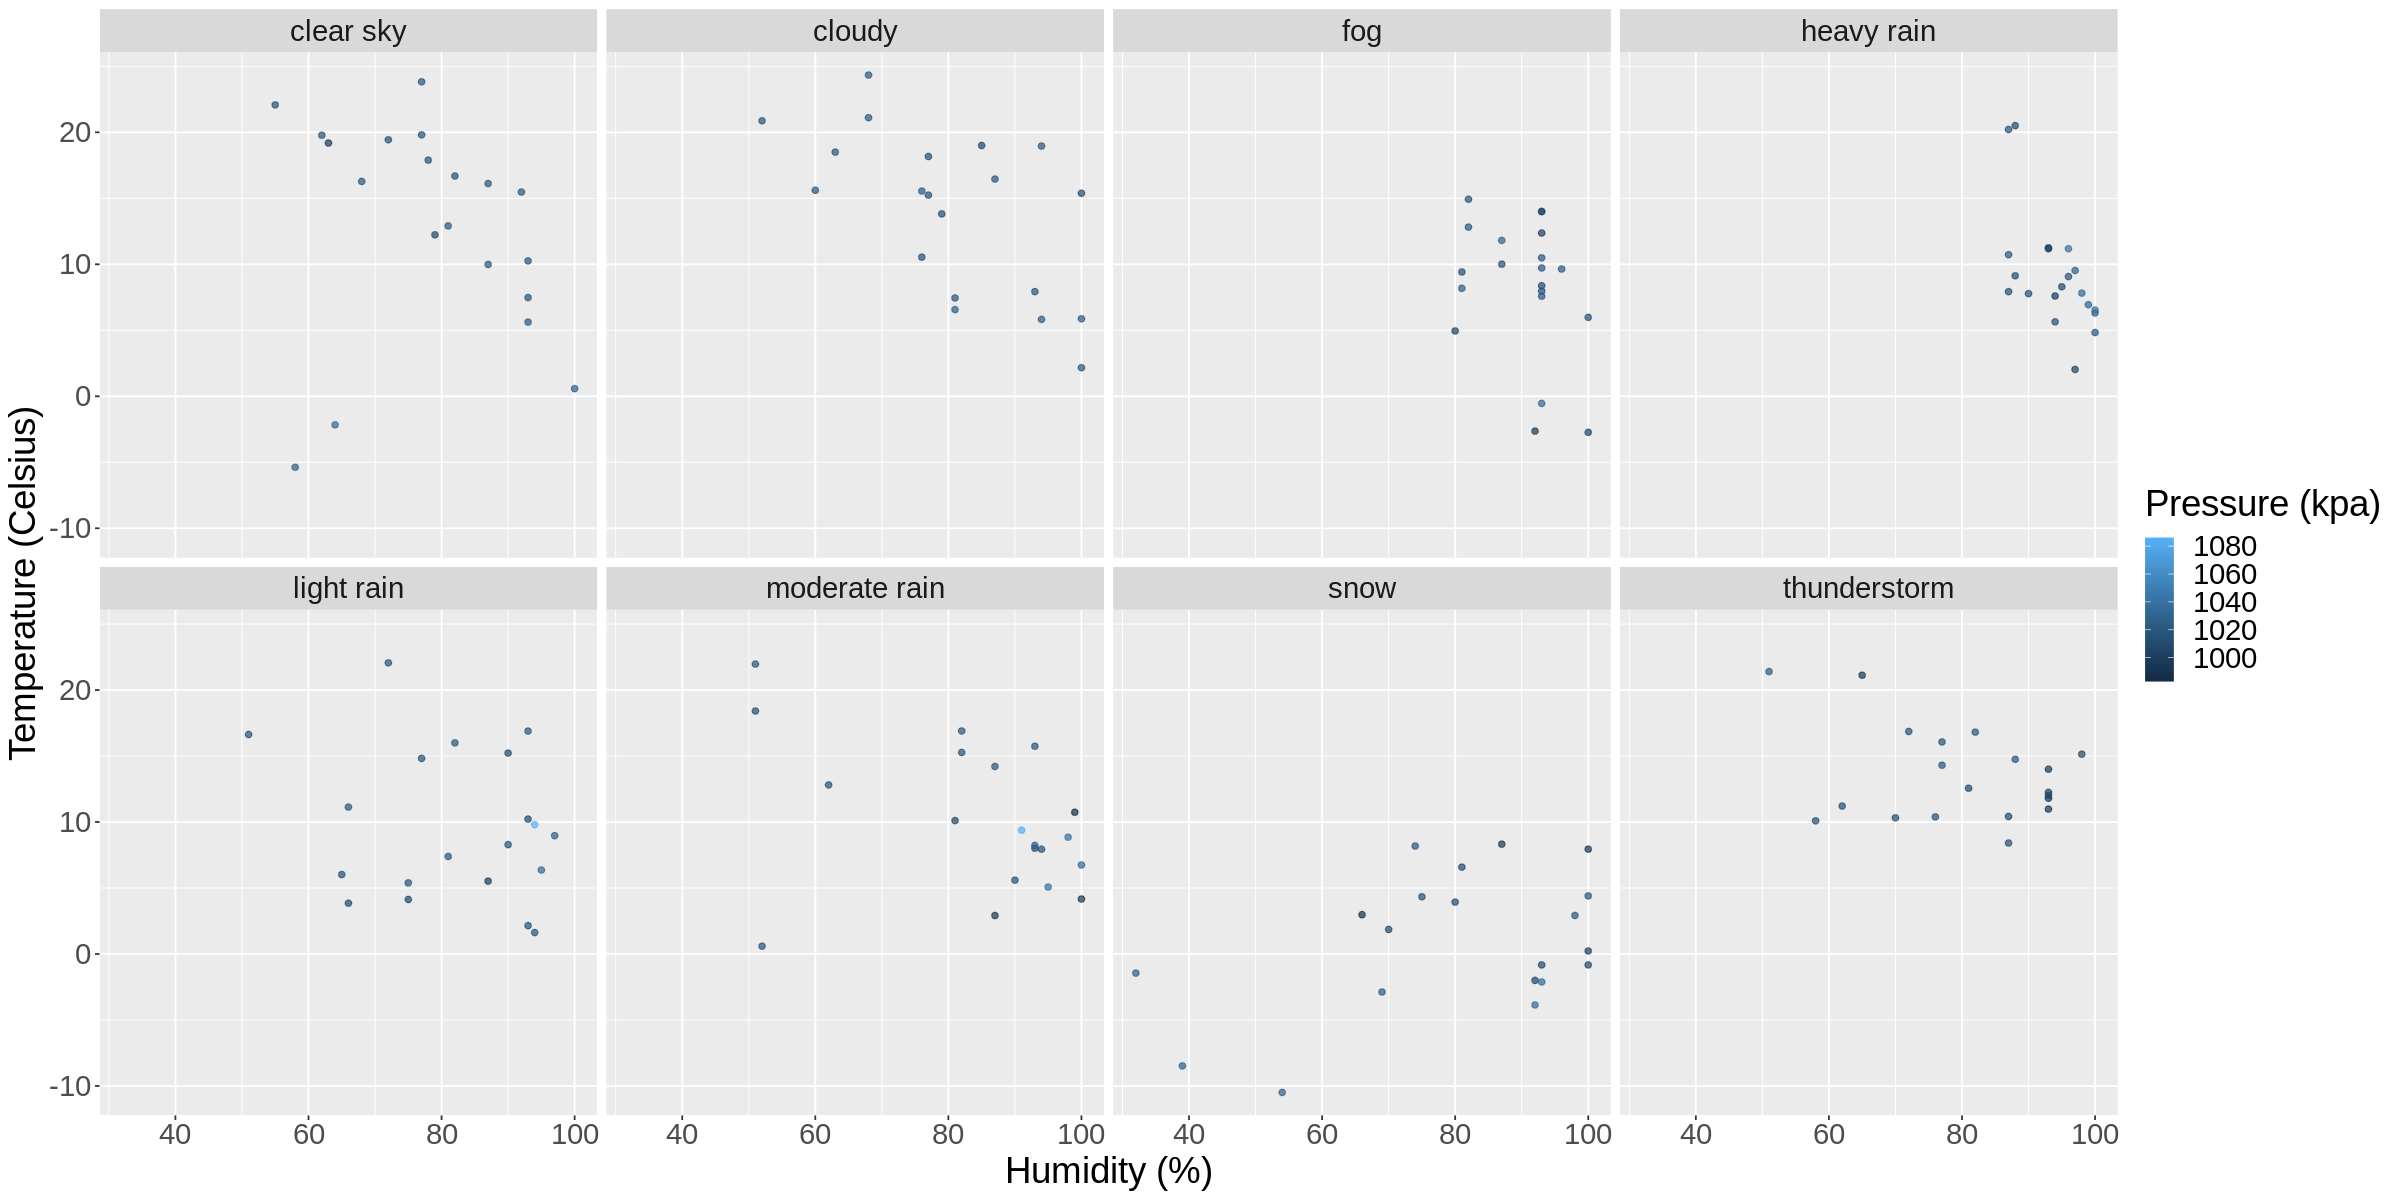

In [9]:
options(repr.plot.width = 20, repr.plot.height = 10) 

weather_data_plot_fct <- rbind_data %>%
  ggplot(aes(x = humidity.pct, y = temperature.c, colour = pressure.kpa)) +
  geom_point(alpha = 0.7) +
  labs(x = "Humidity (%)", 
       y = "Temperature (Celsius)",
       color = "Pressure (kpa)") +
  facet_wrap(~ factor(description, levels = c("clear sky", "cloudy", "fog", "heavy rain", "light rain", "moderate rain", "snow", "thunderstorm")), ncol = 4) +
  theme(text = element_text(size = 22))
weather_data_plot_fct

### Methods

(Kelly)

We will only use data that is relevant to Vancouver for the following variables: 
• date & time (in year-month-day-hour format)
• temperature
• humidity (in percentage)
• pressure (in kPa)
• wind speed (in m/s)
• description of the weather type (excluding the following types: volcanic ash, dust, smoke, haze, since they do not occur normally)


- **city_attributes.csv**: description of different cities.
- **humidity.csv**: includes humidity in different cities at specific day time(year-month-day-hour)
- **pressure.csv**: includes air pressure in different cities at specific day time(year-month-day-hour)
- **temperature.csv**: includes temperature in different cities at specific day time(year-month-day-hour)
- **weather_description.csv**: description of different weather patterns at specific day time at different cities. - the qualitative variable we would like to classify on
- **wind_direciton.csv**: we will not use this file, as it is relevant for weather prediction, but not classification
- **wind_speed.csv**: includes wind speed in different cities at a specific day time(year-month-day-hour)


### Expected Outcomes and Significance
(Ina)

### References

Auger, N., et al. (2011). Preterm Birth During an Extreme Weather Event in Québec,
Canada: A “Natural Experiment”. Matern Child Health J, 15, 1088-1096. https://doi.org/10.1007/s10995-010-0645-0
 
Weyn, Jonathan A., et al. (2019). Can Machines Learn to Predict Weather? Using DeepLearning to Predict Gridded 500‐hPa Geopotential Height From Historical Weather Data. Journal of Advances in Modeling Earth Systems, 11(8), 2680-2693.
https://doi.org/10.1029/2019MS001705

